In [42]:
import mlflow

# Configuration de l'URI de suivi MLflow pour le serveur local
mlflow.set_tracking_uri("http://127.0.0.1:5000")


In [2]:
import pandas as pd

train = pd.read_csv('train_merged.csv')
test = pd.read_csv( 'test_merged.csv')

In [3]:
import pandas as pd
import numpy as np

def optimize_dataframe_by_correlation(df, threshold):
    """
    Optimise un DataFrame en supprimant les variables redondantes basées sur un seuil de corrélation.

    :param df: DataFrame à optimiser.
    :param threshold: Seuil de corrélation pour identifier les paires de variables redondantes.
    :return: DataFrame optimisé avec les variables redondantes supprimées.
    """
    # Sélectionner uniquement les variables numériques et calculer la matrice de corrélation
    num_vars = df.select_dtypes(include=[np.number])
    num_corr_matrix = num_vars.corr()

    # Trouver les paires de variables hautement corrélées
    high_corr_pairs = []
    for i in range(len(num_corr_matrix.columns)):
        for j in range(i):
            if abs(num_corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((num_corr_matrix.columns[i], num_corr_matrix.columns[j], num_corr_matrix.iloc[i, j]))

    # Identifier les variables à supprimer
    to_remove = set()
    for var1, var2, _ in high_corr_pairs:
        if var1 not in to_remove and var2 not in to_remove:
            if df[var1].isna().sum() > df[var2].isna().sum():
                to_remove.add(var1)
            else:
                to_remove.add(var2)

    # Supprimer les variables redondantes
    df_reduced = df.drop(columns=to_remove)

    return df_reduced

# Appliquer la méthode au DataFrame
threshold = 0.8  # Remplacez par le seuil de votre choix
train_optimized_num = optimize_dataframe_by_correlation(train, threshold)

print(train_optimized_num.shape)


(307511, 133)


In [4]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

def optimize_categorical_dataframe(df, threshold_p_value):
    """
    Optimise un DataFrame en supprimant les variables catégorielles redondantes basées sur un seuil de p-value.

    :param df: DataFrame à optimiser.
    :param threshold_p_value: Seuil de p-value pour identifier les paires de variables catégorielles associées.
    :return: DataFrame optimisé avec les variables catégorielles redondantes supprimées.
    """
    # Sélectionner uniquement les variables catégorielles
    cat_vars = df.select_dtypes(exclude=[np.number])
    cat_var_names = cat_vars.columns.tolist()

    # Trouver les paires de variables catégorielles associées
    associated_pairs = []
    for i in range(len(cat_var_names)):
        for j in range(i):
            contingency_table = pd.crosstab(df[cat_var_names[i]], df[cat_var_names[j]])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            if p < threshold_p_value:
                associated_pairs.append((cat_var_names[i], cat_var_names[j], p))

    # Identifier les variables catégorielles à supprimer
    to_remove = set()
    for var1, var2, p_value in associated_pairs:
        if p_value < threshold_p_value:
            if df[var1].isna().sum() > df[var2].isna().sum():
                to_remove.add(var1)
            else:
                to_remove.add(var2)

    # Supprimer les variables catégorielles redondantes
    df_reduced = df.drop(columns=to_remove)

    return df_reduced

# Appliquer la méthode au DataFrame
threshold_p_value = 0.05  # Remplacez par le seuil de votre choix
train_optimized_num_cat = optimize_categorical_dataframe(train_optimized_num, threshold_p_value)
print(train_optimized_num_cat.shape)


(307511, 117)


In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


#HomeCredit_columns_description

In [6]:
import pandas as pd

def presence_rate(data):
    # Calculer le pourcentage de présence des données pour chaque colonne
    presence_rate = (1 - data.isnull().mean()) * 100
    
    # Trier la série presence_rate par valeurs décroissantes
    sorted_presence_rate = presence_rate.sort_values(ascending=False)
    
    # Formater chaque pourcentage avec deux chiffres après la virgule et ajouter le caractère '%'
    formatted_presence_rate = sorted_presence_rate.apply(lambda x: f'{x:.2f} %')
    
    # Retourner le taux de présence formaté et trié
    return formatted_presence_rate

presence_rate(train_optimized_num_cat)

SK_ID_CURR                                         100.00 %
ORGANIZATION_TYPE                                  100.00 %
FLAG_DOCUMENT_3                                    100.00 %
FLAG_DOCUMENT_4                                    100.00 %
FLAG_DOCUMENT_5                                    100.00 %
FLAG_DOCUMENT_6                                    100.00 %
FLAG_DOCUMENT_7                                    100.00 %
FLAG_DOCUMENT_8                                    100.00 %
FLAG_DOCUMENT_9                                    100.00 %
FLAG_DOCUMENT_10                                   100.00 %
FLAG_DOCUMENT_11                                   100.00 %
FLAG_DOCUMENT_12                                   100.00 %
FLAG_DOCUMENT_13                                   100.00 %
FLAG_DOCUMENT_14                                   100.00 %
FLAG_DOCUMENT_15                                   100.00 %
FLAG_DOCUMENT_16                                   100.00 %
FLAG_DOCUMENT_17                        

In [7]:
train_optimized_num_cat.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_DAYS_CREDIT_max,BUREAU_DAYS_CREDIT_mean,BUREAU_CREDIT_DAY_OVERDUE_sum,BUREAU_DAYS_CREDIT_ENDDATE_max,BUREAU_DAYS_ENDDATE_FACT_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_max,BUREAU_CNT_CREDIT_PROLONG_sum,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_OVERDUE_mean,BUREAU_DAYS_CREDIT_UPDATE_mean,BUREAU_AMT_ANNUITY_mean,BUREAU_AMT_ANNUITY_sum,ca_Active,ca_Bad debt,ca_Sold,ct_Another type of loan,ct_Car loan,ct_Cash loan (non-earmarked),ct_Consumer credit,ct_Credit card,ct_Interbank credit,ct_Loan for business development,ct_Loan for purchase of shares (margin lending),ct_Loan for the purchase of equipment,ct_Loan for working capital replenishment,ct_Microloan,ct_Mobile operator loan,ct_Mortgage,ct_Real estate loan,ct_Unknown type of loan,MONTHS_BALANCE_min,MONTHS_BALANCE_max,CNT_INSTALMENT_FUTURE_sum,SK_DPD_sum_x,SK_DPD_DEF_sum_x,AMT_BALANCE_sum,AMT_CREDIT_LIMIT_ACTUAL_sum,AMT_DRAWINGS_ATM_CURRENT_sum,AMT_PAYMENT_CURRENT_sum,CNT_DRAWINGS_CURRENT_sum,SK_DPD_sum_y,SK_DPD_DEF_sum_y,AMT_DOWN_PAYMENT_sum,RATE_DOWN_PAYMENT_mean,CNT_PAYMENT_sum,INST_NUM_INSTALMENT_VERSION_mean,INST_NUM_INSTALMENT_NUMBER_max,INST_DAYS_INSTALMENT_mean,INST_AMT_PAYMENT_sum
0,100002,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-3648.0,-2120,NaN,1,1,0,1,1,0,2,10,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0369,0.9722,0.6243,0.0144,0.0690,0.0833,0.1250,0.0375,0.0000,0.00,0.0149,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-103.0,-874.000000,0.0,780.0,-697.500000,5043.645,0.0,865055.565,245781.0,0.0,-499.875000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.0,-1.0,285.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,24.0,1.052632,19.0,-295.000000,219625.695
1,100003,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1186.0,-291,NaN,1,1,0,1,1,0,1,11,0,0,0,0,School,0.311267,0.622246,NaN,0.0529,0.9851,0.7987,0.0608,0.0345,0.2917,0.3333,0.0132,0.0039,0.01,0.0714,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-606.0,-1400.750000,0.0,1216.0,-1097.333333,0.000,0.0,1017400.500,0.0,0.0,-816.000000,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-77.0,-18.0,162.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6885.00,0.050030,30.0,1.040000,12.0,-1378.160000,1618864.650
2,100004,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-4260.0,-2531,26.0,1,1,1,1,1,0,2,9,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-408.0,-867.000000,0.0,-382.0,-532.500000,0.000,0.0,189037.800,0.0,0.0,-532.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-27.0,-24.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,

In [8]:
# Étape 1 : Identifier les variables à conserver
columns_to_keep = train_optimized_num_cat.columns.tolist()
if 'TARGET' in columns_to_keep:
    columns_to_keep.remove('TARGET')

# Étape 2 : Appliquer la sélection au DataFrame test
test_optimized_num_cat = test[columns_to_keep]

# Étape 3 : Vérification
print(test_optimized_num_cat.shape)


(48744, 116)


In [9]:
presence_rate(test_optimized_num_cat)

SK_ID_CURR                                         100.00 %
DAYS_LAST_PHONE_CHANGE                             100.00 %
FLAG_DOCUMENT_3                                    100.00 %
FLAG_DOCUMENT_4                                    100.00 %
FLAG_DOCUMENT_5                                    100.00 %
FLAG_DOCUMENT_6                                    100.00 %
FLAG_DOCUMENT_7                                    100.00 %
FLAG_DOCUMENT_8                                    100.00 %
FLAG_DOCUMENT_9                                    100.00 %
FLAG_DOCUMENT_10                                   100.00 %
FLAG_DOCUMENT_11                                   100.00 %
FLAG_DOCUMENT_12                                   100.00 %
FLAG_DOCUMENT_13                                   100.00 %
FLAG_DOCUMENT_14                                   100.00 %
FLAG_DOCUMENT_15                                   100.00 %
FLAG_DOCUMENT_16                                   100.00 %
FLAG_DOCUMENT_17                        

In [10]:
# pip install dtale

In [11]:
import dtale
dtale.show(train_optimized_num_cat)


In [12]:
day_variables = [col for col in train_optimized_num_cat.columns if 'DAYS' in col or 'DATE' in col]
print("Variables représentant des nombres de jours:", day_variables)


Variables représentant des nombres de jours: ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'BUREAU_DAYS_CREDIT_max', 'BUREAU_DAYS_CREDIT_mean', 'BUREAU_DAYS_CREDIT_ENDDATE_max', 'BUREAU_DAYS_ENDDATE_FACT_mean', 'BUREAU_DAYS_CREDIT_UPDATE_mean', 'INST_DAYS_INSTALMENT_mean']


In [13]:
money_variables = [col for col in train_optimized_num_cat.columns if 'AMT' in col or 'INCOME' in col or 'CREDIT' in col or 'ANNUITY' in col]
print("Variables représentant des montants d'argent:", money_variables)


Variables représentant des montants d'argent: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'BUREAU_DAYS_CREDIT_max', 'BUREAU_DAYS_CREDIT_mean', 'BUREAU_CREDIT_DAY_OVERDUE_sum', 'BUREAU_DAYS_CREDIT_ENDDATE_max', 'BUREAU_AMT_CREDIT_MAX_OVERDUE_max', 'BUREAU_CNT_CREDIT_PROLONG_sum', 'BUREAU_AMT_CREDIT_SUM_sum', 'BUREAU_AMT_CREDIT_SUM_DEBT_sum', 'BUREAU_AMT_CREDIT_SUM_OVERDUE_mean', 'BUREAU_DAYS_CREDIT_UPDATE_mean', 'BUREAU_AMT_ANNUITY_mean', 'BUREAU_AMT_ANNUITY_sum', 'AMT_BALANCE_sum', 'AMT_CREDIT_LIMIT_ACTUAL_sum', 'AMT_DRAWINGS_ATM_CURRENT_sum', 'AMT_PAYMENT_CURRENT_sum', 'AMT_DOWN_PAYMENT_sum', 'INST_AMT_PAYMENT_sum']


In [14]:
import pandas as pd
import numpy as np

def remove_outliers(data, variables_list, num_std=3):
    """
    Supprime les valeurs aberrantes des variables spécifiées dans un DataFrame.

    :param data: DataFrame contenant les données.
    :param variables_list: Liste des noms des variables à nettoyer.
    :param num_std: Nombre d'écarts-types utilisés pour définir une valeur aberrante.
    :return: DataFrame avec les valeurs aberrantes supprimées.
    """
    for var in variables_list:
        if var in data.columns:
            # Calculer la moyenne et l'écart-type
            mean, std = data[var].mean(), data[var].std()
            
            # Définir les seuils pour les valeurs aberrantes
            lower_bound, upper_bound = mean - num_std * std, mean + num_std * std
            
            # Remplacer les valeurs aberrantes par NaN ou une autre valeur spécifique
            data[var] = np.where(
                (data[var] > lower_bound) & (data[var] < upper_bound),
                data[var],
                np.NaN  # ou une autre valeur de votre choix
            )
    return data

In [15]:
variables_list=money_variables
train=remove_outliers(train_optimized_num_cat, variables_list, num_std=2)

In [16]:
variables_list=money_variables
test=remove_outliers(test_optimized_num_cat, variables_list, num_std=2)

C:\Users\Melhem\AppData\Local\Temp\ipykernel_16672\250838036.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
variables_list=day_variables
train=remove_outliers(train_optimized_num_cat, variables_list, num_std=2)

In [18]:
variables_list=day_variables
test=remove_outliers(test_optimized_num_cat, variables_list, num_std=2)

In [19]:
def convert_days_to_years_and_rename(df, columns):
    """
    Convertit les valeurs en jours en années pour les colonnes spécifiées dans un DataFrame et renomme ces colonnes.

    Args:
    df (pd.DataFrame): DataFrame contenant les données.
    columns (list): Liste des noms de colonnes à convertir.

    Returns:
    pd.DataFrame: DataFrame avec les colonnes converties et renommées.
    """
    for col in columns:
        new_col_name = col.replace('DAYS_', 'YEARS_')
        # Convertir les jours en années, en évitant les valeurs aberrantes pour DAYS_EMPLOYED
        if col == 'DAYS_EMPLOYED':
            df[new_col_name] = df[col].apply(lambda x: x / -365 if x < 0 else 0)
        else:
            df[new_col_name] = df[col].apply(lambda x: x / -365)
        df.drop(columns=[col], inplace=True)
    return df

In [20]:
# Exemple d'utilisation
columns_to_convert = day_variables
train = convert_days_to_years_and_rename(train, columns_to_convert)

In [21]:
# Exemple d'utilisation
columns_to_convert = day_variables
test = convert_days_to_years_and_rename(test, columns_to_convert)

In [22]:
def finite_unique_values_variables(df):

    # Créer un dictionnaire pour stocker le nombre de valeurs uniques pour chaque variable
    unique_counts = {col: df[col].nunique() for col in df.columns}
    
    # Filtrer pour obtenir les variables avec un nombre fini de valeurs uniques
    # Vous pouvez définir un seuil spécifique si nécessaire, par exemple, moins de 20 valeurs uniques
    finite_vars = {col: count for col, count in unique_counts.items() if count < 20}  # Exemple de seuil: 20
    
    # Afficher la liste des variables à nombre fini de valeurs uniques
    print(finite_vars)

    return finite_vars


In [23]:
finite_unique_values_variables(train)

{'TARGET': 2, 'CNT_CHILDREN': 15, 'FLAG_MOBIL': 2, 'FLAG_EMP_PHONE': 2, 'FLAG_WORK_PHONE': 2, 'FLAG_CONT_MOBILE': 2, 'FLAG_PHONE': 2, 'FLAG_EMAIL': 2, 'REGION_RATING_CLIENT_W_CITY': 3, 'REG_REGION_NOT_LIVE_REGION': 2, 'LIVE_REGION_NOT_WORK_REGION': 2, 'REG_CITY_NOT_LIVE_CITY': 2, 'LIVE_CITY_NOT_WORK_CITY': 2, 'DEF_60_CNT_SOCIAL_CIRCLE': 9, 'FLAG_DOCUMENT_2': 2, 'FLAG_DOCUMENT_3': 2, 'FLAG_DOCUMENT_4': 2, 'FLAG_DOCUMENT_5': 2, 'FLAG_DOCUMENT_6': 2, 'FLAG_DOCUMENT_7': 2, 'FLAG_DOCUMENT_8': 2, 'FLAG_DOCUMENT_9': 2, 'FLAG_DOCUMENT_10': 2, 'FLAG_DOCUMENT_11': 2, 'FLAG_DOCUMENT_12': 2, 'FLAG_DOCUMENT_13': 2, 'FLAG_DOCUMENT_14': 2, 'FLAG_DOCUMENT_15': 2, 'FLAG_DOCUMENT_16': 2, 'FLAG_DOCUMENT_17': 2, 'FLAG_DOCUMENT_18': 2, 'FLAG_DOCUMENT_19': 2, 'FLAG_DOCUMENT_20': 2, 'FLAG_DOCUMENT_21': 2, 'AMT_REQ_CREDIT_BUREAU_HOUR': 1, 'AMT_REQ_CREDIT_BUREAU_DAY': 1, 'AMT_REQ_CREDIT_BUREAU_WEEK': 1, 'AMT_REQ_CREDIT_BUREAU_MON': 3, 'AMT_REQ_CREDIT_BUREAU_QRT': 2, 'AMT_REQ_CREDIT_BUREAU_YEAR': 6, 'BUREAU_CNT

{'TARGET': 2,
 'CNT_CHILDREN': 15,
 'FLAG_MOBIL': 2,
 'FLAG_EMP_PHONE': 2,
 'FLAG_WORK_PHONE': 2,
 'FLAG_CONT_MOBILE': 2,
 'FLAG_PHONE': 2,
 'FLAG_EMAIL': 2,
 'REGION_RATING_CLIENT_W_CITY': 3,
 'REG_REGION_NOT_LIVE_REGION': 2,
 'LIVE_REGION_NOT_WORK_REGION': 2,
 'REG_CITY_NOT_LIVE_CITY': 2,
 'LIVE_CITY_NOT_WORK_CITY': 2,
 'DEF_60_CNT_SOCIAL_CIRCLE': 9,
 'FLAG_DOCUMENT_2': 2,
 'FLAG_DOCUMENT_3': 2,
 'FLAG_DOCUMENT_4': 2,
 'FLAG_DOCUMENT_5': 2,
 'FLAG_DOCUMENT_6': 2,
 'FLAG_DOCUMENT_7': 2,
 'FLAG_DOCUMENT_8': 2,
 'FLAG_DOCUMENT_9': 2,
 'FLAG_DOCUMENT_10': 2,
 'FLAG_DOCUMENT_11': 2,
 'FLAG_DOCUMENT_12': 2,
 'FLAG_DOCUMENT_13': 2,
 'FLAG_DOCUMENT_14': 2,
 'FLAG_DOCUMENT_15': 2,
 'FLAG_DOCUMENT_16': 2,
 'FLAG_DOCUMENT_17': 2,
 'FLAG_DOCUMENT_18': 2,
 'FLAG_DOCUMENT_19': 2,
 'FLAG_DOCUMENT_20': 2,
 'FLAG_DOCUMENT_21': 2,
 'AMT_REQ_CREDIT_BUREAU_HOUR': 1,
 'AMT_REQ_CREDIT_BUREAU_DAY': 1,
 'AMT_REQ_CREDIT_BUREAU_WEEK': 1,
 'AMT_REQ_CREDIT_BUREAU_MON': 3,
 'AMT_REQ_CREDIT_BUREAU_QRT': 2,
 'AMT_

In [24]:
import pandas as pd

def remove_single_value_columns(df):
    """
    Supprime les colonnes d'un DataFrame qui ne contiennent qu'une seule valeur unique.

    :param df: DataFrame à nettoyer.
    :return: DataFrame avec les colonnes à valeur unique supprimées.
    """
    # Identifier les colonnes avec une seule valeur unique
    single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
    
    # Supprimer ces colonnes
    df_cleaned = df.drop(columns=single_value_columns)
    
    return df_cleaned

# Appliquer la fonction à votre DataFrame
train = remove_single_value_columns(train)


print(train.shape)


(307511, 113)


In [25]:
# Étape 1 : Identifier les variables à conserver
columns_to_keep = train.columns.tolist()
if 'TARGET' in columns_to_keep:
    columns_to_keep.remove('TARGET')

# Étape 2 : Appliquer la sélection au DataFrame test
test = test[columns_to_keep]

# Étape 3 : Vérification
print(test.shape)


(48744, 112)


In [26]:
# Supprimer les entrées avec plus de 3 enfants
train = train[train['CNT_CHILDREN'] <= 3]
print(train.shape)


(306956, 113)


In [27]:
# Supprimer les entrées avec plus de 3 enfants
test = test[test['CNT_CHILDREN'] <= 3]
print(test.shape)


(48673, 112)


In [28]:
def symmetrical_log_transform(df, monetary_vars, small_value=1e-6):
    for var in monetary_vars:
        if var in df.columns:
            # Appliquer une transformation symétrique du logarithme
            df[var + '_log'] = np.sign(df[var]) * np.log(np.abs(df[var]) + small_value)
    return df


In [29]:
def one_hot_encode(df, cat_vars):
    return pd.get_dummies(df, columns=cat_vars, dummy_na=True, drop_first=True)


In [30]:
# Liste des variables monétaires
monetary_vars = money_variables
# Liste des variables catégorielles
cat_vars = train.select_dtypes(exclude=[np.number]).columns.tolist()

# Appliquer la transformation logarithmique
train = symmetrical_log_transform(train, monetary_vars)
test = symmetrical_log_transform(test, monetary_vars)

# Appliquer l'encodage One-Hot
train = one_hot_encode(train, cat_vars)
test = one_hot_encode(test, cat_vars)


In [31]:
print(train.shape)


(306956, 189)


In [32]:
import xgboost as xgb
import pandas as pd

def train_xgboost_and_get_feature_importance(df, target_column, random_state=42, eval_metric='logloss'):
   
    """
    Entraîne un classificateur XGBoost sur le dataframe donné et la colonne cible,
    puis retourne un dataframe avec l'importance des caractéristiques.

    Paramètres :
    - df (pd.DataFrame) : Le dataframe d'entrée contenant les caractéristiques et la cible.
    - target_column (str) : Le nom de la colonne cible.
    - random_state (int) : La graine utilisée par le générateur de nombres aléatoires.
    - eval_metric (str) : La métrique d'évaluation à utiliser pour l'entraînement du modèle.

    Retourne :
    - pd.DataFrame : Un dataframe avec deux colonnes : Feature et Importance, triées par importance.
    """

    # Séparation des caractéristiques et de la cible
    X_train = df.drop(target_column, axis=1)
    y_train = df[target_column]

    # Création et entraînement du modèle XGBoost
    xgb_model = xgb.XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric=eval_metric)
    xgb_model.fit(X_train, y_train)

    # Obtention de l'importance des caractéristiques
    feature_importances = xgb_model.feature_importances_
    feature_names = X_train.columns
    importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Retourner le DataFrame des importances triées
    return importances_df.sort_values(by='Importance', ascending=False)

# Utilisation de la fonction :
# Remplacez 'your_dataframe' par votre DataFrame réel et 'your_target_column' par le nom réel de votre colonne cible.
importances = train_xgboost_and_get_feature_importance(train, 'TARGET')
print(importances)


                                             Feature  Importance
21                                      EXT_SOURCE_3    0.048002
20                                      EXT_SOURCE_2    0.046122
36                                   FLAG_DOCUMENT_3    0.023829
129                         INST_AMT_PAYMENT_sum_log    0.023522
78                                      ct_Microloan    0.017256
19                                      EXT_SOURCE_1    0.015522
34                          DEF_60_CNT_SOCIAL_CIRCLE    0.013886
128                         AMT_DOWN_PAYMENT_sum_log    0.013651
136                   ORGANIZATION_TYPE_Construction    0.013540
183              ORGANIZATION_TYPE_Transport: type 3    0.013147
87                                  SK_DPD_DEF_sum_x    0.012781
171                  ORGANIZATION_TYPE_Self-employed    0.012683
118            BUREAU_AMT_CREDIT_MAX_OVERDUE_max_log    0.012535
80                                       ct_Mortgage    0.012231
168                      

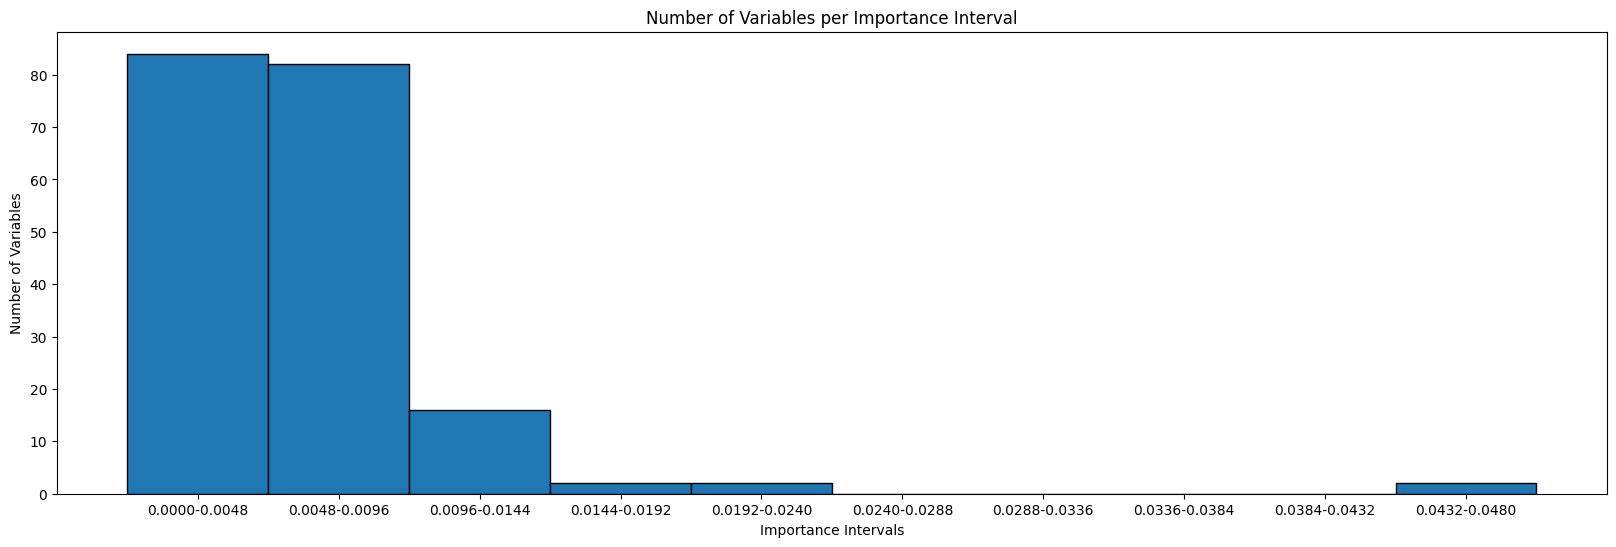

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_importance_histogram(importance_values, num_bins=10):
    # Convertir en array numpy si ce n'est pas déjà le cas
    importance_values = np.array(importance_values)
    
    # Créer les bins adaptés aux valeurs d'importance
    max_importance = np.max(importance_values)
    bins = np.linspace(0, max_importance, num_bins + 1)
    
    # Utiliser np.histogram pour obtenir le compte des valeurs dans chaque bin
    counts, edges = np.histogram(importance_values, bins)
    
    # Plot the histogram
    plt.figure(figsize=(20, 6))
    plt.bar(range(num_bins), counts, width=1, align='center', edgecolor='k')
    plt.xticks(range(num_bins), [f'{edges[i]:.4f}-{edges[i+1]:.4f}' for i in range(num_bins)])
    plt.xlabel('Importance Intervals')
    plt.ylabel('Number of Variables')
    plt.title('Number of Variables per Importance Interval')
    plt.show()

# Utilisation de la fonction avec vos valeurs d'importance
plot_importance_histogram(importances['Importance'], num_bins=10)


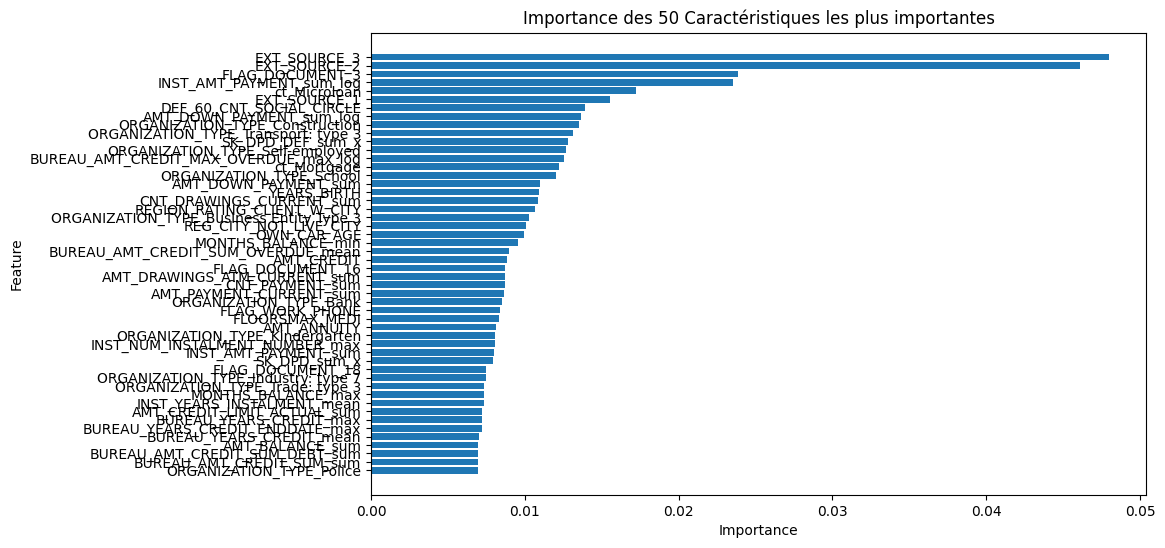

In [34]:
import matplotlib.pyplot as plt

def plot_feature_importance(importances, num_features=50):
    # Tri des importances par ordre décroissant
    importances_sorted = importances.sort_values(by='Importance', ascending=False)

    # Sélectionner les meilleures caractéristiques
    top_features = importances_sorted.head(num_features)

    # Création du diagramme de barres horizontales
    plt.figure(figsize=(10, 6))  # Ajustez la taille de la figure si nécessaire
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Importance des {num_features} Caractéristiques les plus importantes')
    plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher les caractéristiques les plus importantes en haut
    plt.show()

# Utilisation de la méthode avec le DataFrame des importances et spécification du nombre de caractéristiques à afficher
plot_feature_importance(importances, num_features=50)


In [35]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold

def train_xgboost_with_cross_validation(df, target_column, n_splits=5, random_state=42, eval_metric='logloss'):
    """
    Entraîne un classificateur XGBoost en utilisant la validation croisée et retourne les importances moyennes des caractéristiques.

    Paramètres :
    - df (pd.DataFrame) : Le dataframe d'entrée contenant les caractéristiques et la cible.
    - target_column (str) : Le nom de la colonne cible.
    - n_splits (int) : Le nombre de subdivisions pour la validation croisée KFold.
    - random_state (int) : La graine utilisée par le générateur de nombres aléatoires.
    - eval_metric (str) : La métrique d'évaluation à utiliser pour l'entraînement du modèle.

    Retourne :
    - pd.DataFrame : Un dataframe avec deux colonnes : Feature et Importance, triées par importance.
    """

    # Séparation des caractéristiques et de la cible
    X_train = df.drop(target_column, axis=1)
    y_train = df[target_column]

    # Configuration de la validation croisée
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Initialisation de la liste pour stocker les importances des caractéristiques
    feature_importances = []

    # Boucle sur chaque division de la validation croisée
    for train_index, test_index in kf.split(X_train):
        # Séparation des données en ensembles d'entraînement et de test
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

        # Entraînement du modèle
        model = xgb.XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric=eval_metric)
        model.fit(X_train_cv, y_train_cv)
        # Stockage des importances des caractéristiques
        feature_importances.append(model.feature_importances_)

    # Calcul de la moyenne des importances des caractéristiques sur toutes les divisions
    mean_importances = np.mean(feature_importances, axis=0)

    # Création d'un DataFrame pour les importances des caractéristiques
    importances_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': mean_importances
    }).sort_values(by='Importance', ascending=False)

    return importances_df


In [36]:
importances_cv = train_xgboost_with_cross_validation(train, 'TARGET')
print(importances_cv)

                                             Feature  Importance
20                                      EXT_SOURCE_2    0.042694
21                                      EXT_SOURCE_3    0.042380
36                                   FLAG_DOCUMENT_3    0.022042
128                         AMT_DOWN_PAYMENT_sum_log    0.017885
19                                      EXT_SOURCE_1    0.014966
78                                      ct_Microloan    0.014029
87                                  SK_DPD_DEF_sum_x    0.012855
80                                       ct_Mortgage    0.012703
17                            REG_CITY_NOT_LIVE_CITY    0.012234
183              ORGANIZATION_TYPE_Transport: type 3    0.012233
171                  ORGANIZATION_TYPE_Self-employed    0.012075
136                   ORGANIZATION_TYPE_Construction    0.011763
129                         INST_AMT_PAYMENT_sum_log    0.011386
134         ORGANIZATION_TYPE_Business Entity Type 3    0.010983
101                      

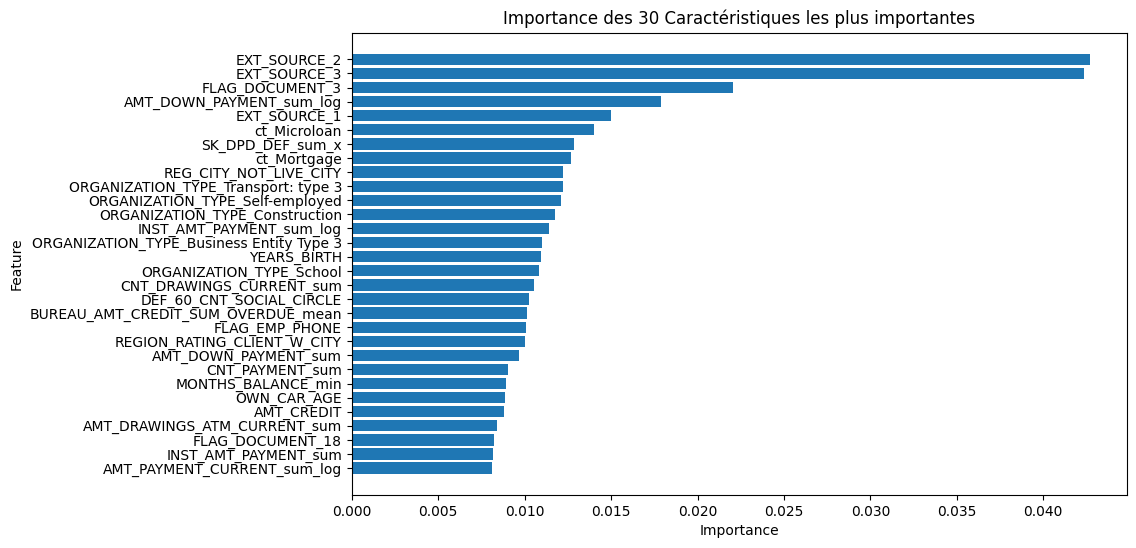

In [37]:
plot_feature_importance(importances_cv,30)


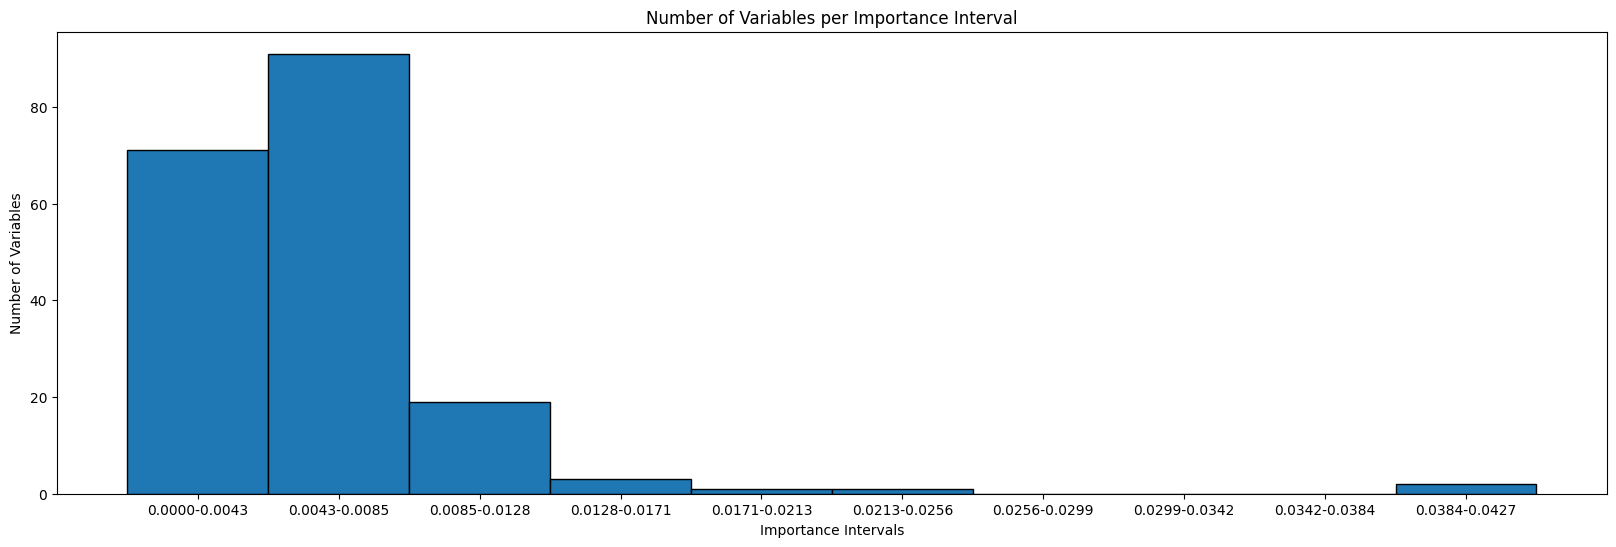

In [38]:
plot_importance_histogram(importances_cv['Importance'], num_bins=10)

In [43]:
import mlflow
import mlflow.sklearn
import xgboost as xgb
import pandas as pd
import os

# Créez une nouvelle expérience avec un nom spécifique et obtenez son ID
def create_or_get_experiment(experiment_name):
    experiment = mlflow.get_experiment_by_name(experiment_name)
    if experiment is None:
        experiment_id = mlflow.create_experiment(experiment_name)
    else:
        experiment_id = experiment.experiment_id
    return experiment_id

def log_feature_importance(experiment_id, df, target_column, random_state=42, eval_metric='logloss'):
    # Séparation des caractéristiques et de la cible
    X_train = df.drop(target_column, axis=1)
    y_train = df[target_column]

    # Enregistrement d'un nouveau run avec l'ID de l'expérience spécifiée
    with mlflow.start_run(experiment_id=experiment_id):
        # Entraînement du modèle XGBoost
        xgb_model = xgb.XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric=eval_metric)
        xgb_model.fit(X_train, y_train)

        # Enregistrement des caractéristiques d'importance avec MLflow
        mlflow.sklearn.log_model(xgb_model, "xgboost_model")
        feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_})
        
        # Enregistrez la DataFrame en tant que fichier CSV temporaire
        feature_importances.to_csv("feature_importance_temp.csv", index=False)
        
        # Enregistrez le fichier CSV temporaire en tant qu'artefact
        mlflow.log_artifact("feature_importance_temp.csv", "feature_importance.csv")
        
        # Supprimez le fichier CSV temporaire après l'avoir enregistré en tant qu'artefact
        os.remove("feature_importance_temp.csv")

        mlflow.log_param("eval_metric", eval_metric)
        mlflow.log_param("random_state", random_state)

    # Affichage des caractéristiques d'importance
    print("Caractéristiques d'importance enregistrées avec succès.")
    return feature_importances

target_column_name = 'TARGET'
experiment_name = "train_and_log_feature_importance"

# Créez ou obtenez l'ID de l'expérience
experiment_id = create_or_get_experiment(experiment_name)

# Utilisation de la fonction pour enregistrer les caractéristiques d'importance
importances = log_feature_importance(experiment_id, train, target_column_name)


Caractéristiques d'importance enregistrées avec succès.


C:\Users\Melhem\Desktop\FormationOpenClassRooms\projet7bis\mon_projet_ml\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning:

Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.

C:\Users\Melhem\Desktop\FormationOpenClassRooms\projet7bis\mon_projet_ml\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning:

Setuptools is replacing distutils.



In [44]:
import mlflow


# Recherchez les runs de l'expérience spécifiée
runs = mlflow.search_runs(experiment_ids=[experiment_id])

# Affichez les résultats
print(runs)


                             run_id       experiment_id    status  \
0  ac9d6cbe1a1b4499b9bfb1a3bb2a4315  745752119910359836  FINISHED   

                                                                      artifact_uri  \
0  mlflow-artifacts:/745752119910359836/ac9d6cbe1a1b4499b9bfb1a3bb2a4315/artifacts   

                        start_time                         end_time  \
0 2024-01-16 16:32:20.088000+00:00 2024-01-16 16:32:37.297000+00:00   

  params.random_state params.eval_metric tags.mlflow.source.type  \
0                  42            logloss                   LOCAL   

                                                                                            tags.mlflow.source.name  \
0  C:\Users\Melhem\Desktop\FormationOpenClassRooms\projet7bis\mon_projet_ml\Lib\site-packages\ipykernel_launcher.py   

                                                                                                                                                                         

2024-01-16 17:54:23,034 - INFO     - Executing shutdown due to inactivity...
2024-01-16 17:54:35,301 - INFO     - Executing shutdown...
2024-01-16 17:54:35,305 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
